In [226]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


In [227]:
#import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [228]:
df = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# Get a first look at the dataset

In [229]:
#shape of the dataset,
df.shape

#we have 2253 rows and 16 colums

(2253, 16)

In [230]:
#find the datatypes in this data set
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

# Data Cleaning

In [231]:
#check for duplicates. It looks like that we don't have any duplicates
df.duplicated().sum()

0

In [232]:
#we can see that there are a few columns with vlaues such as -1, -1.0, '-1'. We'll replace these with as nan for now

df=df.replace(-1,np.nan)
df=df.replace(-1.0,np.nan)
df=df.replace('-1',np.nan)

In [233]:
#find missing values (nan values)
df.isnull().sum()

#we can see that most of the missing data are in the columns 'Comepetitors' and 'Easy Apply'

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [234]:
#for easier referencing, we'll rename our columns
df.rename(columns={'Unnamed: 0':'index','Job Title': 'job_title','Salary Estimate':'salary_estimate','Job Description':'job_description',
                  'Rating':'rating','Company Name':'company_name', 'Location':'location', 'Headquarters':'headquarters','Size':'size',
                  'Founded':'founded', 'Type of ownership':'type_of_ownership', 'Industry':'industry', 'Sector':'sector','Revenue':'revenue', 'Competitors':'competitors', 'Easy Apply':'easy_apply'}, inplace=True)

In [235]:
#fill in the missing values
df.fillna('0', inplace=True)
df['size'].replace(0, 'Unknown')

#check to to if missing values were replaced by 'Unknown' in this case
df.isnull().sum()

index                0
job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
competitors          0
easy_apply           0
dtype: int64

In [236]:
#clean the company_name column which contain company name and rating and create a new column called company with just the company name
df['company'] = df['company_name'].str.replace('\n.*','')

In [237]:
#drop company_name and index columns
df.drop(['company_name', 'index'], axis=1, inplace=True)


In [238]:
# split the salary estimate column to grab the min salary
salary = df['salary_estimate'].str.split("-",expand=True,)


min_salary = salary[0]
min_salary = min_salary.str.replace('K',' ')
min_salary = min_salary.str.replace('$', ' ').fillna(0).astype('int')

df['min_salary'] = min_salary


In [239]:
# split the salary estimate column to grab the max salary

max_salary = salary[1]
max_salary = max_salary.str.replace('K',' ')
max_salary = max_salary.str.replace('(Glassdoor est.)',' ')
max_salary = max_salary.str.replace('$', ' ')
max_salary = max_salary.str.replace('(', ' ')
max_salary = max_salary.str.replace(')', ' ').fillna(0).astype('int')

df['max_salary'] = max_salary

In [240]:
#drop the salary estimate column as we don't need it anymore
df.drop('salary_estimate', axis=1, inplace=True)

In [241]:
#find the where min_salary is 0 and drop the row because min salary cannot be zero
df.loc[df['min_salary']==0]
df.drop(index=2149,inplace=True)

In [242]:
#check if it drop worked- we can see in the description that the min salary is now at 24K USD/year
df.min_salary.describe()

count    2252.000000
mean       54.266874
std        19.575375
min        24.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: min_salary, dtype: float64

In [243]:
#clean the revenue column to get min and max revenue
df['revenue'] = df['revenue'].str.replace('$', '')
df['revenue'] = df['revenue'].str.replace(' ', '')
df['revenue'] = df['revenue'].str.replace('(USD)', '')
df['revenue'] = df['revenue'].str.replace('(', '')
df['revenue'] = df['revenue'].str.replace(')', '')
df.revenue.value_counts()

Unknown/Non-Applicable    615
100to500million           218
50to100million            199
10+billion                189
0                         163
10to25million             132
2to5billion               129
1to5million               111
25to50million             109
Lessthan1million           93
1to2billion                87
500millionto1billion       79
5to10million               72
5to10billion               56
Name: revenue, dtype: int64

In [244]:
df['revenue']= df['revenue'].replace('0','Unknown/Non-Applicable' )
df['revenue'] = df['revenue'].replace('Unknown/Non-Applicable', None)


In [245]:
df['revenue'] = df['revenue'].str.replace('2to5billion', '2billionto5billion')
df['revenue'] = df['revenue'].str.replace('5to10billion', '5billionto10billion')
df['revenue'] = df['revenue'].str.replace('1to2billion', '1billionto2billion')
df['revenue'] = df['revenue'].str.replace('Lessthan1million', '0millionto1million')
df['revenue'] = df['revenue'].str.replace('500millionto1billion', '500millionto1billion')

df['revenue'] = df['revenue'].replace('10+billion', '10billionto11billion')


df.revenue.value_counts()

100to500million         328
50to100million          307
10billionto11billion    287
10to25million           213
1to5million             189
2billionto5billion      188
25to50million           166
0millionto1million      146
1billionto2billion      118
500millionto1billion    115
5to10million            105
5billionto10billion      90
Name: revenue, dtype: int64

In [246]:
df['revenue'] = df['revenue'].str.replace('million', '')
df['revenue'] = df['revenue'].str.replace('billion', '000')


df.revenue.value_counts()

100to500        328
50to100         307
10000to11000    287
10to25          213
1to5            189
2000to5000      188
25to50          166
0to1            146
1000to2000      118
500to1000       115
5to10           105
5000to10000      90
Name: revenue, dtype: int64

In [247]:
#split the revenue column to get a min and max revenue
new_revenue = df['revenue'].str.split("to",expand=True,)
min_revenue = (new_revenue[0]).astype('float64')
df['min_revenue']= min_revenue

max_revenue = (new_revenue[1]).astype('float64')
df['max_revenue']= max_revenue
df.max_revenue.fillna(0)
df.min_revenue.fillna(0)



0         100.0
1        2000.0
2        2000.0
3          50.0
4         100.0
         ...   
2248       25.0
2249    10000.0
2250    10000.0
2251       25.0
2252     2000.0
Name: min_revenue, Length: 2252, dtype: float64

In [248]:
#replace the zeroes by 'Unknown' for the type_of_ownership column
df['type_of_ownership']= df['type_of_ownership'].replace('0','Unknown')

In [249]:
#clean the job_title column
job_desc =df['job_title'].str.split(',', expand=True)
df['job_descrip']= job_desc[0]
df['job_descrip']=df['job_descrip'].str.replace('Sr. Data Analyst','Senior Data Analyst')
df['job_descrip']=df['job_descrip'].str.replace('Data Analyst Junior','Junior Data Analyst')
data_jobs = df.job_descrip.value_counts().head(10)

#  Data Analysis

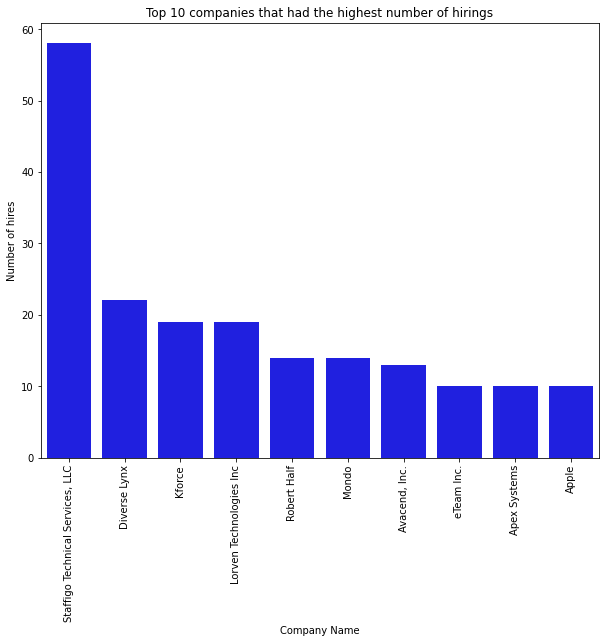

In [250]:
#plot a bar graph to visualize this information#find out which companies are hiring the most
top_company=df.company.value_counts().head(10)

plt.figure(figsize=(10,8))

sns.barplot(x=list(top_company.index), y=list(top_company.values), color= 'blue')
plt.title('Top 10 companies that had the highest number of hirings')
plt.xlabel('Company Name')
plt.ylabel('Number of hires')
plt.xticks(rotation = 90)
plt.show()




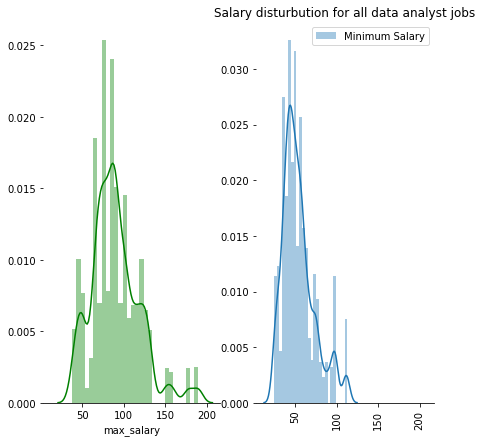

In [251]:
#salary distrubution visulization using histogram and KDE

#set matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)


sns.distplot(df['max_salary'],  color= 'g', ax=axes[0], label = 'Maximum salary')
sns.distplot(df['min_salary'],   ax=axes[1], label = 'Minimum Salary')


plt.title('Salary disturbution for all data analyst jobs')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(rotation = 90)
plt.show()



Text(0.5, 1.0, 'Salary Distribution')

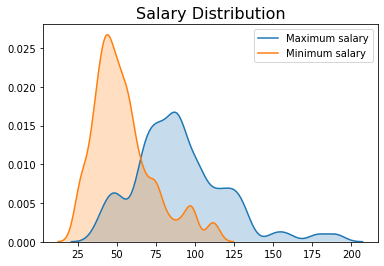

In [252]:
# KDE plots for min and max salaries
sns.kdeplot(data=df['max_salary'], label='Maximum salary', shade=True)
sns.kdeplot(data=df['min_salary'], label='Minimum salary', shade=True)

# Add title
plt.title("Salary Distribution", size =16)

In [253]:
#find the min average salary by location
av_salary_loc_min = (df.groupby('location')['min_salary'].mean().sort_values()).head(10).astype('int')

In [254]:
#find the max average salary by location
av_salary_loc_max = (df.groupby('location')['max_salary'].mean().sort_values()).tail(10).astype('int')

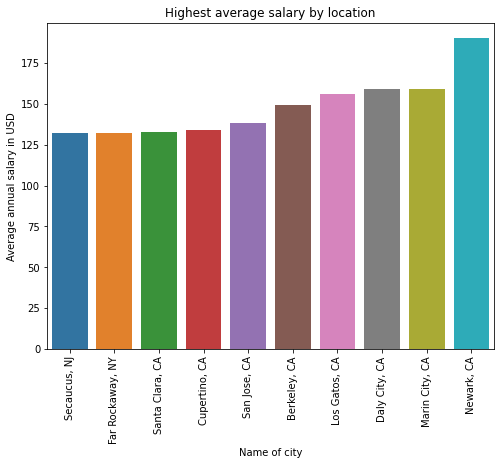

In [255]:
#plot bar graph to show highest average salary by location
plt.figure(figsize =(8,6))

sns.barplot(x=list(av_salary_loc_max.index), y=list(av_salary_loc_max.values) )

plt.title('Highest average salary by location')
plt.xlabel('Name of city')
plt.ylabel('Average annual salary in USD')

plt.xticks(rotation =90)
plt.show()

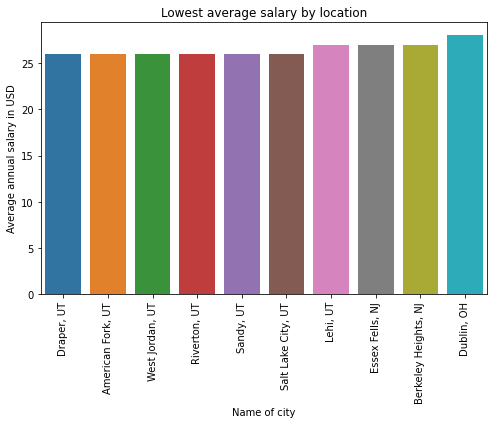

In [256]:
#plot bar graph to show lowest average salary by location
plt.figure(figsize =(8,5))

sns.barplot(x=list(av_salary_loc_min.index),y=list(av_salary_loc_min.values))


plt.title('Lowest average salary by location')
plt.xlabel('Name of city')
plt.ylabel('Average annual salary in USD')

plt.xticks(rotation =90)
plt.show()

We can conclude that that the best paid data analyst jobs are are located in California, with Newark paying upto 190K USD average per year. The worst paid data analyst jobs are located in Utah with Draper paying an average salary of 26K USD per year. 

In [257]:
#calculate average revenue
average_revenue = (df.min_revenue+df.max_revenue)/2
df['average_revenue']= average_revenue

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

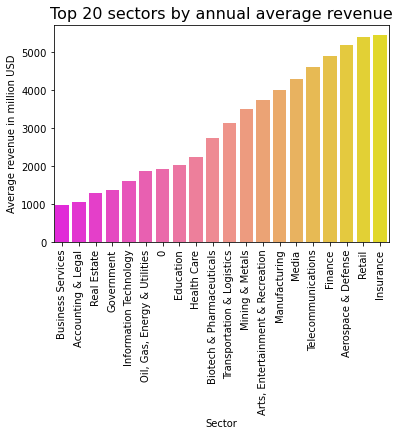

In [258]:
#which sectors make most profit? plot a bargraph to see
top_sector= df.groupby('sector')['average_revenue'].mean().sort_values()
top_sector=top_sector.tail(20).astype('int')

sns.barplot(x= list(top_sector.index), y= list(top_sector.values) , palette='spring')

plt.title('Top 20 sectors by annual average revenue', size =16)
plt.xlabel('Sector')
plt.ylabel('Average revenue in million USD')
plt.xticks(rotation=90)

No surprise that insurance and retail make the highest revenue. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

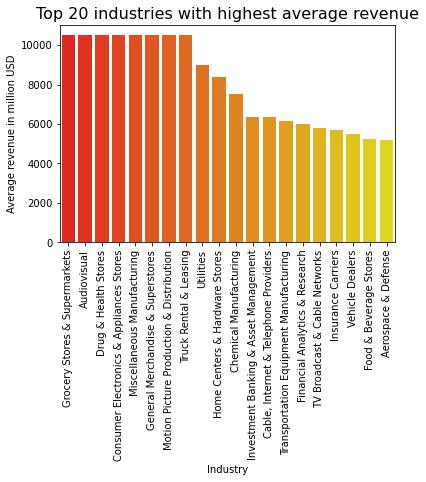

In [259]:
top_industry= df.groupby('industry')['average_revenue'].mean()
top_industry=top_industry.sort_values(ascending=False).head(20).astype('int')

sns.barplot(x= list(top_industry.index), y= list(top_industry.values) , palette='autumn')

plt.title('Top 20 industries with highest average revenue', size =16)
plt.xlabel('Industry')
plt.ylabel('Average revenue in million USD')
plt.xticks(rotation=90)

In [260]:
#for the values 0 in the company size column, we replace them by 'Unknown'
df['size']=df['size'].replace('0', 'Unknown')
hire_comp_size= df.groupby('size')['job_title'].count()

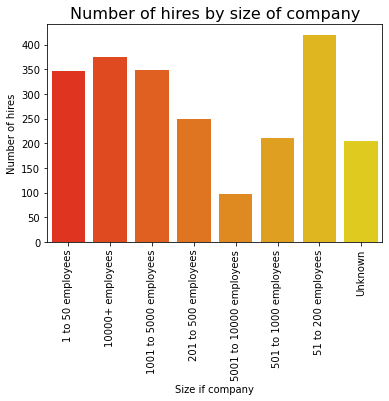

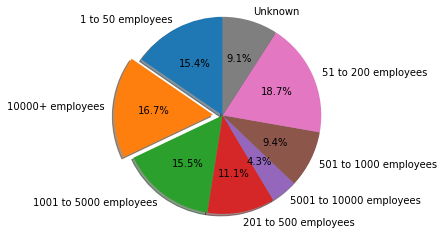

In [261]:
#find the number of hires depending on the size of the company
hire_comp_size= df.groupby('size')['job_title'].count()

sns.barplot(x= hire_comp_size.index, y= hire_comp_size.values , palette='autumn')
plt.title('Number of hires by size of company', size =16)
plt.xlabel('Size if company')
plt.ylabel('Number of hires')
plt.xticks(rotation=90)

#pie chart showing the same results
explode =(0,0.1,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(hire_comp_size, explode=explode, labels=hire_comp_size.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

18.7% of the total hires occurred in relatively small size (51-200 employees) companies

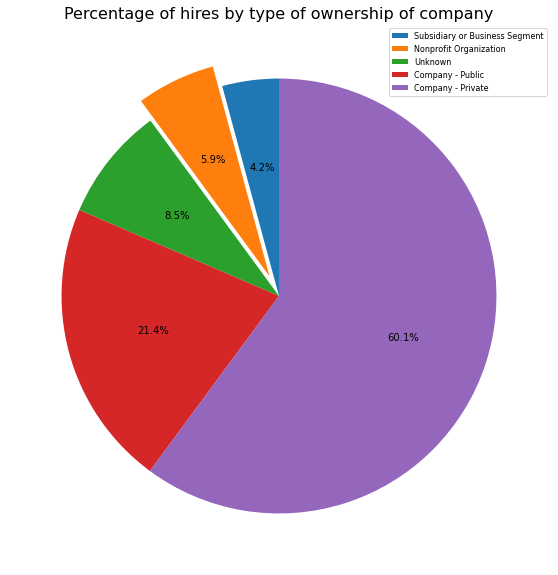

In [262]:
#find number of hires by type of ownership
owner_type = (df.groupby('type_of_ownership')['job_title'].count()).sort_values().tail(5)
#pie chart showing the results
explode =(0,0.1,0,0,0,)

fig1, ax1 = plt.subplots(figsize=(100,10))
ax1.pie(owner_type, explode=explode, autopct='%1.1f%%', startangle=90 )
plt.legend(labels=owner_type.index, loc='upper right', fontsize=8)
plt.title('Percentage of hires by type of ownership of company', size=16)
plt.axis("off")

plt.show()

60% of the total hires occurred in private companies.

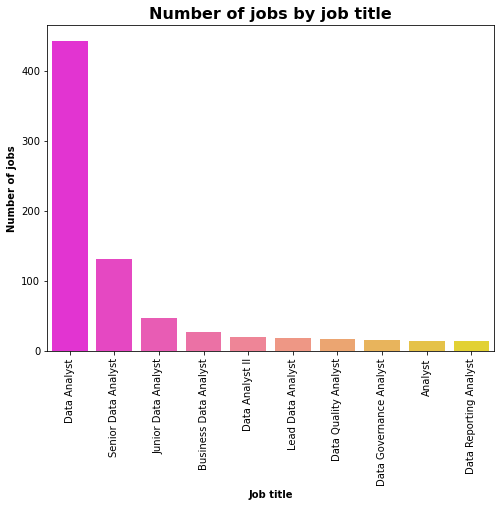

In [263]:
#number of jobs by job title
data_jobs = df.job_descrip.value_counts().head(10)

#plot bar graph to show highest average salary by location
plt.figure(figsize =(8,6))

sns.barplot(x=list(data_jobs.index), y=list(data_jobs.values) , palette='spring')

plt.title('Number of jobs by job title', size=16, fontweight='bold')
plt.xlabel('Job title', fontweight='bold')
plt.ylabel('Number of jobs',fontweight='bold')

plt.xticks(rotation =90)
plt.show()

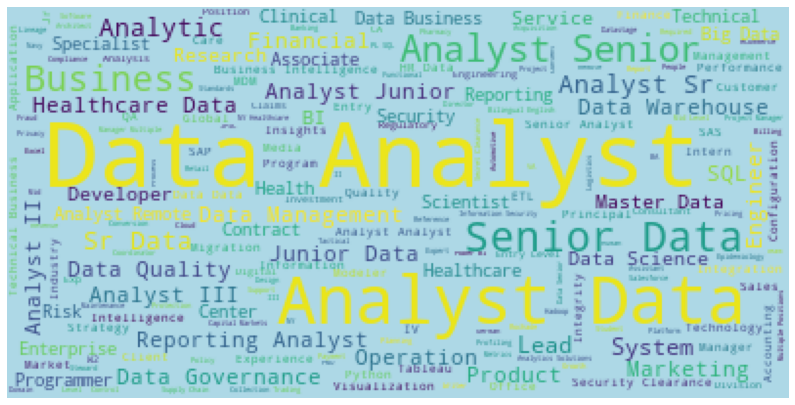

In [266]:
#Word Cloud of job_titles
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

plt.subplots(figsize=(14,14))

wc = WordCloud(background_color = 'lightblue')
txt = df['job_title']
wc.generate(str(' '.join(txt)))
plt.imshow(wc)
plt.axis("off")
plt.show()